In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [26]:
def sigmoid(x,*kwargs):
    # kwargs 
    # first: linear, sigmoid 1 or 2... ; Added lin and quad to make use the same equation to try different modulations of the self discovery
    # second: x0
    # third: a
    # fouth: make superior part of the sigmoid linear (True) or not
    if not kwargs or kwargs[0] == 0 or kwargs[0] == 'lin':
        return x
    elif kwargs[0] == 'quad':
        return x**2
    elif kwargs[0] == 1 or kwargs[0] == 'sigmoid1':
        x0, a = kwargs[1], kwargs[2]
        return 1/(1+np.exp(-a*(x-x0)))
    elif kwargs[0] == 2 or kwargs[0] == 'sigmoid2':
        x0, a = kwargs[1], kwargs[2]
        return x/(1+np.exp(-a*(x-x0)))

def fs_evo(t, fs, pis, qs, l, sigmoid_args):
    f0 = 1 - sum(fs)
    dfsdt = []
    for i in range(len(fs)):
        site_i = i
        dfdt = f0*((1-l)*pis[i]*sigmoid(f0, *sigmoid_args) + l*fs[site_i]) - fs[site_i]/qs[i]
        dfsdt.append(dfdt)
    return dfsdt

In [67]:
pis = (1.0, 1.0)
pis = (0.25, 0.25)
qs = (9.0, 10.0)
l = 0.81
sigmoid_args = [1, 0.5, 10.0]

fs0 = [0.0, 0.0] # all uncomitted

sol = solve_ivp(fs_evo, [0, 2000], fs0, args=(pis, qs, l, sigmoid_args))

/tmp/ipykernel_176385/1369676734.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a*(x-x0)))


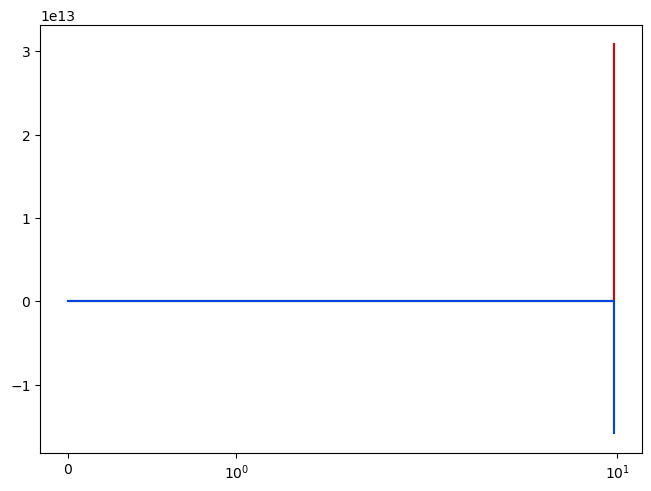

In [68]:
fig, ax = plt.subplots(constrained_layout=True)

ax.set(xscale='symlog')

ax.plot(sol.t, 1-sol.y[0] - sol.y[1], color='xkcd:red')
ax.plot(sol.t, sol.y[0], color='xkcd:green')
ax.plot(sol.t, sol.y[1], color='xkcd:blue')

In [57]:
# stationary state:
f1, f2 = sol.y[0][-1], sol.y[1][-1]
f0 = 1 - f1 - f2
print(f0, f1, f2)

0.10127615643605115 0.0004122822618024672 0.8983115613021464


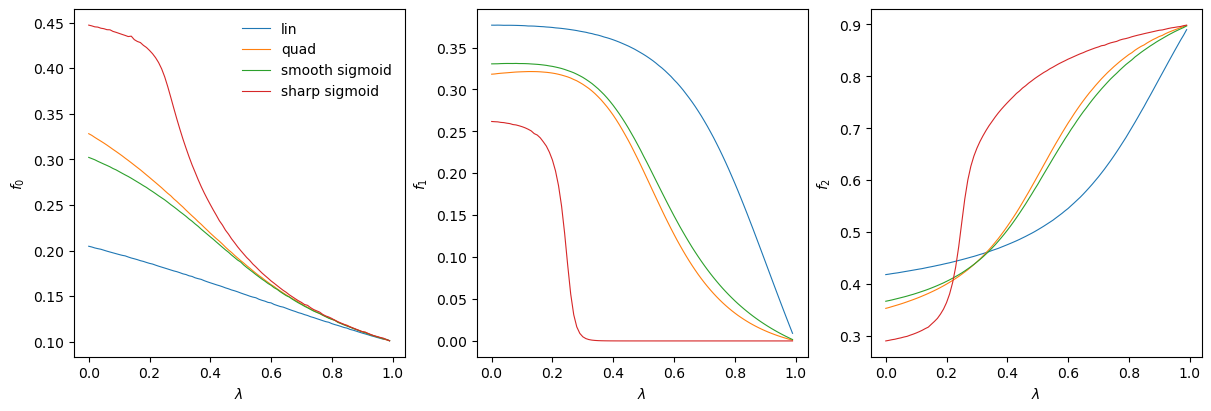

In [32]:
pis = (1.0, 1.0)
qs = (9.0, 10.0)
ls = np.arange(0.0, 1.0, 0.01)

labels = [r'$f_0$', r'$f_0^2$', 'smooth sigmoid', 'sharp sigmoid']
labels = ['lin', 'quad', 'smooth sigmoid', 'sharp sigmoid']
sig_args_list = [['lin', ], ['quad', ], [1, 0.5, 10.0], [1, 0.5, 50.0]]

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
for sig_args, sdmod_label in zip(sig_args_list, labels):
    sols_l = [[], [], []]
    for l in ls:
        sol = solve_ivp(fs_evo, [0, 2000], fs0, args=(pis, qs, l, sig_args))
        f1, f2 = sol.y[0][-1], sol.y[1][-1]
        f0 = 1 - f1 - f2
        sols_l[0].append(f0), sols_l[1].append(f1), sols_l[2].append(f2)
    for i in range(3):
        label = sdmod_label if i == 0 else '_nolabel_'
        ax[i].plot(ls, sols_l[i], label=label, lw=0.8)

for i in range(3):
    ax[i].set(ylabel=rf'$f_{i}$', xlabel='$\lambda$')
ax[0].legend(frameon=False)

fig.savefig(f'fs_levo_sigmoid_sdmod_compare_x0_0.5_pi_{pis[0]}_q1_{qs[0]}_q2_{qs[1]}.png')

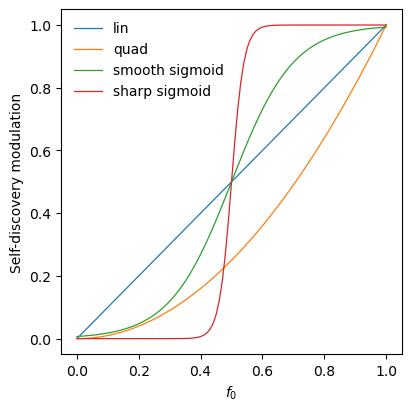

In [33]:
# plot of the self disocvery modulation methdos:

fig, ax = plt.subplots(1, 1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel='$f_0$', ylabel='Self-discovery modulation')

f0s = np.arange(0.0, 1.01, 0.01)
for sig_args, sdmod_label in zip(sig_args_list, labels):
    sdmod = sigmoid(f0s, *sig_args)
    ax.plot(f0s, sdmod, label=sdmod_label, lw=0.9)
ax.legend(frameon=False)
fig.savefig('sdmod_functions.png')

### efect of the position of x0

/tmp/ipykernel_176385/1369676734.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a*(x-x0)))


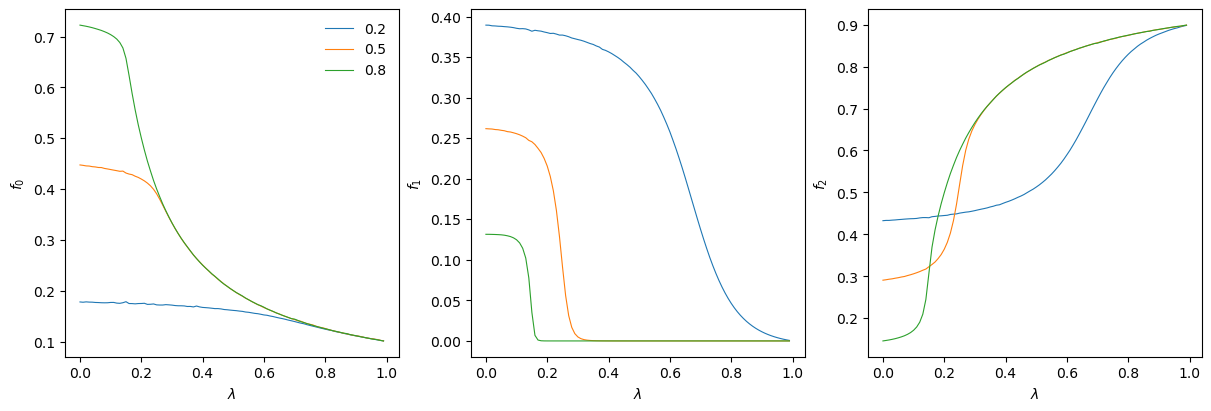

In [41]:
pis = (1.0, 1.0)
qs = (9.0, 10.0)
ls = np.arange(0.0, 1.0, 0.01)

x0s = [0.2, 0.5, 0.8]
a = 50.0

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
for x0 in x0s:
    sig_args = [1, x0, a]
    sols_l = [[], [], []]
    for l in ls:
        sol = solve_ivp(fs_evo, [0, 2000], fs0, args=(pis, qs, l, sig_args))
        f1, f2 = sol.y[0][-1], sol.y[1][-1]
        f0 = 1 - f1 - f2
        sols_l[0].append(f0), sols_l[1].append(f1), sols_l[2].append(f2)
    for i in range(3):
        label = x0 if i == 0 else '_nolabel_'
        ax[i].plot(ls, sols_l[i], label=label, lw=0.8)

for i in range(3):
    ax[i].set(ylabel=rf'$f_{i}$', xlabel='$\lambda$')
ax[0].legend(frameon=False)

fig.savefig(f'fs_levo_sigmoid_sdmod_compare_x0s_a_{a}_pi_{pis[0]}_q1_{qs[0]}_q2_{qs[1]}.png')

### what if linearly bounded sdmod

/tmp/ipykernel_176385/1369676734.py:16: RuntimeWarning: overflow encountered in exp
  return x/(1+np.exp(-a*(x-x0)))


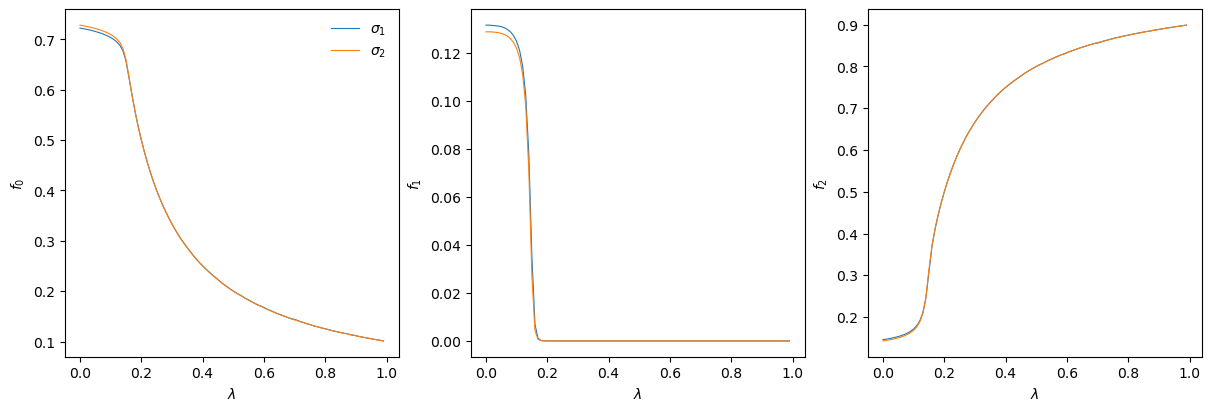

In [44]:
pis = (1.0, 1.0)
qs = (9.0, 10.0)
ls = np.arange(0.0, 1.0, 0.01)

x0s = [0.2, 0.5, 0.8]
x0, a = 0.8, 50.0

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
for sigType in [1,2]:
    sig_args = [sigType, x0, a]
    sols_l = [[], [], []]
    for l in ls:
        sol = solve_ivp(fs_evo, [0, 2000], fs0, args=(pis, qs, l, sig_args))
        f1, f2 = sol.y[0][-1], sol.y[1][-1]
        f0 = 1 - f1 - f2
        sols_l[0].append(f0), sols_l[1].append(f1), sols_l[2].append(f2)
    for i in range(3):
        label = fr'$\sigma_{sigType}$' if i == 0 else '_nolabel_'
        ax[i].plot(ls, sols_l[i], label=label, lw=0.8)

for i in range(3):
    ax[i].set(ylabel=rf'$f_{i}$', xlabel='$\lambda$')
ax[0].legend(frameon=False)

fig.savefig(f'fs_levo_sigmoid_sdmod_compare_sigType_x0_{x0}_a_{a}_pi_{pis[0]}_q1_{qs[0]}_q2_{qs[1]}.png')

### what about the value of pi

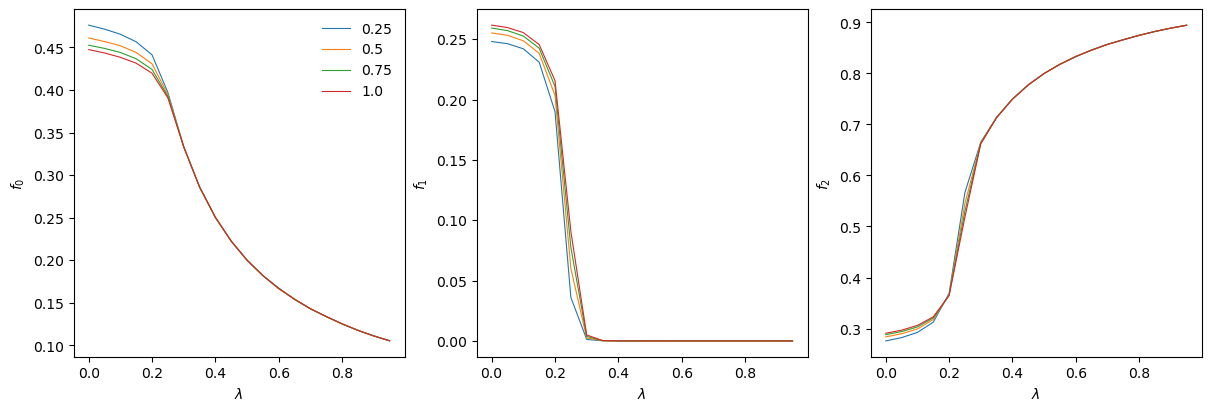

In [71]:
pis = [0.25, 0.5, 0.75, 1.0]
qs = (9.0, 10.0)
ls = np.arange(0.0, 1.0, 0.05)

sig_args = [1, 0.5, 50.0]

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
for pi in pis:
    sols_l = [[], [], []]
    for l in ls:
        sol = solve_ivp(fs_evo, [0, 2000], fs0, args=((pi, pi), qs, l, sig_args))
        f1, f2 = sol.y[0][-1], sol.y[1][-1]
        f0 = 1 - f1 - f2
        sols_l[0].append(f0), sols_l[1].append(f1), sols_l[2].append(f2)
    for i in range(3):
        label = pi if i == 0 else '_nolabel_'
        ax[i].plot(ls, sols_l[i], label=label, lw=0.8)

for i in range(3):
    ax[i].set(ylabel=rf'$f_{i}$', xlabel='$\lambda$')
ax[0].legend(frameon=False)

fig.savefig(f'fs_levo_sigmoid_sdmod_compare_pis_x0_{sig_args[1]}_a_{sig_args[2]}_q1_{qs[0]}_q2_{qs[1]}.png')

# Compare to the model with cross inhibition and constant pi
<p> The CI model has to stable fixed points; we focus on the fixed point where the good option is chosen<p>

In [81]:
def fs_evo_CI(t,fs,pis,qs,l,lci,ci_kwargs=[0, ]):
    f0 = 1 - sum(fs)
    dfsdt = []
    for i in range(len(fs)):
        site_i = i
        dfdt = f0*((1-l)*pis[i]+l*fs[site_i]) - fs[site_i]/qs[i] #- lci*fs[site_i]*(sum(fs[1:site_i])+sum(fs[site_i+1:]))
        for j in range(len(fs)):
            site_j = j
            if site_j != site_i:
                dfdt += -lci*fs[site_i]*sigmoid(fs[site_j],*ci_kwargs)
        dfsdt.append(dfdt)
    return dfsdt

In [86]:
ls = np.arange(0.0, 1.0, 0.05)
qs = (9.0, 10.0)

a = 50.0

fs_SDmod = [[], [], []]
SDmod_sig_args = [1, 0.5, a]
pis_SDmod = (1.0, 1.0)

fs_CI_lowpi = [[], [], []]
fs_CI_highpi = [[], [], []]
CI_sig_args = [1, 0.3, a]
pis_CI = (0.1, 0.1)

for l in ls:
    # modulating self discovery
    sol = solve_ivp(fs_evo, [0, 2000], fs0, args=(pis_SDmod, qs, l, SDmod_sig_args))
    f1, f2 = sol.y[0][-1], sol.y[1][-1]
    f0 = 1 - f1 - f2
    fs_SDmod[0].append(f0), fs_SDmod[1].append(f1), fs_SDmod[2].append(f2)
    # with non linear cross inhibition; low pi
    sol = solve_ivp(fs_evo_CI, [0, 2000], fs0, args=(pis_CI, qs, l, 1.0, CI_sig_args))
    f1, f2 = sol.y[0][-1], sol.y[1][-1]
    f0 = 1 - f1 - f2
    fs_CI_lowpi[0].append(f0), fs_CI_lowpi[1].append(f1), fs_CI_lowpi[2].append(f2)
    # with non linear cross inhibition; high pi
    sol = solve_ivp(fs_evo_CI, [0, 2000], fs0, args=((0.5, 0.5), qs, l, 1.0, CI_sig_args))
    f1, f2 = sol.y[0][-1], sol.y[1][-1]
    f0 = 1 - f1 - f2
    fs_CI_highpi[0].append(f0), fs_CI_highpi[1].append(f1), fs_CI_highpi[2].append(f2)

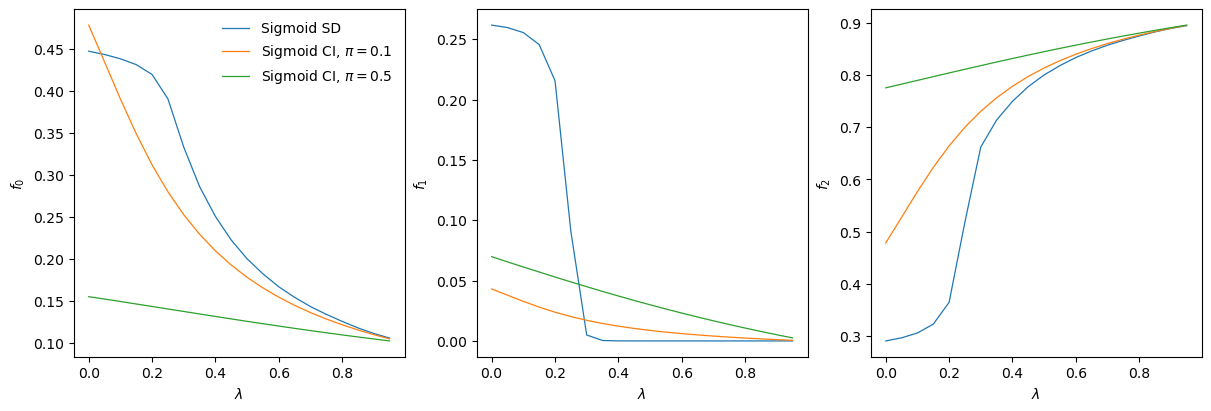

In [91]:
fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)

fs_list = [fs_SDmod, fs_CI_lowpi, fs_CI_highpi]
fs_labels = ['Sigmoid SD', 'Sigmoid CI, $\pi = 0.1$', 'Sigmoid CI, $\pi = 0.5$']
for fs,fs_label in zip(fs_list, fs_labels):
    for i in range(3):
        label = fs_label if i == 0 else '_nolabel_'
        ax[i].plot(ls, fs[i], label=label, lw=0.9)

for i in range(3):
    ax[i].set(ylabel=rf'$f_{i}$', xlabel='$\lambda$')
ax[0].legend(frameon=False)

fig.savefig(f'fs_levo_sigmoid_a_{a}_SD_vs_CI_q1_{qs[0]}_q2_{qs[1]}.png')